<a href="https://colab.research.google.com/github/hikmatfarhat-ndu/NN-online/blob/main/6keras-multilayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multilayer Feedforward Using Keras Functional API


In this exercise we train our keras model on the MNIST dataset again. But this time we use keras instead and specifically we use the keras functional API

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Flatten,Conv2D

In [2]:
def load_dataset():
  # tensorflow assumes the input and output are row vectors
  # where as in our implementation we use them as column vectors
    tr,te=tf.keras.datasets.mnist.load_data()
    X=tr[0].astype("float32")/255
    Y=tr[1]
    Y=Y.reshape(1,len(Y))
    V=np.zeros((10,Y.shape[1]))
    for j in range(Y.shape[1]):
        V[Y[0,j],j]=1
        
    Y=V.astype("float32")
    test_data=te[0].astype("float32")/255
    test_labels=te[1].astype("float32")
    test_labels=test_labels.reshape(1,len(test_labels))
    return X,Y.T,test_data,test_labels.T


### Rectified Linear Unit 
In this exercise we use the ReLU activation function for the inner layers. The sigmoid, and similar, activation functions suffer from the __vanishing gradient__ problem especially for deep networks. This is due to the saturation of the sigmoid where for large values the derivative approaches zero. In multilayer networks, we saw that derivative at a given layer is multiplied by the derivative of the next (backpropagation) which makes learning harder.

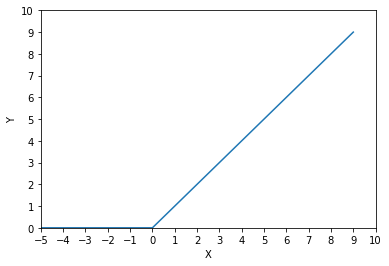

In [3]:
def relu(x):
  return x*(x>0)
relu_x=np.array([i for i in range(-5,10)])
relu_y=relu(relu_x)
fig,ax=plt.subplots()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(-5,10)
ax.set_ylim(0,10)
ax.plot(relu_x,relu_y)
plt.xticks(range(-5,11,1))
plt.yticks(np.arange(0,11,1))
plt.show()

## Keras Functional API

Even though our model for this exercise is also __Sequential__ we will introduce the more flexible __functional__ API.
If we use the __Sequential__ model then our model would be
```
model= Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))
```

### Equivalent model using the functional API

In [4]:
input=tf.keras.layers.Input(shape=(784,))
first_dense=tf.keras.layers.Dense(128,activation="relu")(input)
second_dense=tf.keras.layers.Dense(64,activation="relu")(first_dense)
last_layer=tf.keras.layers.Dense(10,activation="softmax")(second_dense)

model=tf.keras.Model(inputs=input,outputs=last_layer)

### Create a build model function

Since we will be instantiating the model more than once it is convenient to define a function to create the model


In [4]:
def get_model():
  input=tf.keras.layers.Input(shape=(784,))
  first_dense=tf.keras.layers.Dense(128,activation="relu")(input)
  second_dense=tf.keras.layers.Dense(64,activation="relu")(first_dense)
  last_layer=tf.keras.layers.Dense(10,activation="softmax")(second_dense)

  return tf.keras.Model(inputs=input,outputs=last_layer)

In [5]:
X,Y,test_data,test_labels = load_dataset()

X=X.reshape(60000,784)
test_data=test_data.reshape(10000,784)


### Using the function call instead of names

__NOTE__: the labels are in one-hot encoding. If they were not then we use
```
SparseCategoricalCrossentropy instead of CategoricalCrossentropy
```


In [6]:
model=get_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(),  # Optimizer
    # Loss function to minimize
    #loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=["accuracy"]
)


### Saving intermediate computations

In [7]:
batch_size=64

filepath="checkpoints/cp-{epoch}.ckpt"
cb=tf.keras.callbacks.ModelCheckpoint(filepath,save_weights_only=True,save_freq='epoch',verbose=0)

### Fit model to data

In [8]:
history = model.fit(X,Y,batch_size=batch_size,epochs=5,callbacks=[cb],verbose=1)

Epoch 1/5
938/938 [==============================] - 2s 3ms/step - loss: 0.2750 - accuracy: 0.9215
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1143 - accuracy: 0.9655
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0802 - accuracy: 0.9758
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0601 - accuracy: 0.9811
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0475 - accuracy: 0.9851


### List the content of the directory

In [9]:
!ls  -lR /content/checkpoints

/content/checkpoints:
total 14216
-rw-r--r-- 1 root root      75 Nov 21 06:19 checkpoint
-rw-r--r-- 1 root root 1315485 Nov 21 06:17 cp-10.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root    1634 Nov 21 06:17 cp-10.ckpt.index
-rw-r--r-- 1 root root 1315485 Nov 21 06:17 cp-11.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root    1634 Nov 21 06:17 cp-11.ckpt.index
-rw-r--r-- 1 root root 1315485 Nov 21 06:19 cp-1.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root    1634 Nov 21 06:19 cp-1.ckpt.index
-rw-r--r-- 1 root root 1315485 Nov 21 06:19 cp-2.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root    1634 Nov 21 06:19 cp-2.ckpt.index
-rw-r--r-- 1 root root 1315485 Nov 21 06:19 cp-3.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root    1634 Nov 21 06:19 cp-3.ckpt.index
-rw-r--r-- 1 root root 1315485 Nov 21 06:19 cp-4.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root    1634 Nov 21 06:19 cp-4.ckpt.index
-rw-r--r-- 1 root root 1315485 Nov 21 06:19 cp-5.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root    163

In [11]:
import os
latest = tf.train.latest_checkpoint("checkpoints")
cp=tf.train.load_checkpoint("checkpoints/cp-4.ckpt")
print(cp)
model=get_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(),  # Optimizer
    # Loss function to minimize
    #loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=["accuracy"]
)

model.load_weights("checkpoints/cp-4.ckpt")
history = model.fit(X,Y,batch_size=batch_size,epochs=5)

Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0469 - accuracy: 0.9850
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0390 - accuracy: 0.9873
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0302 - accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0246 - accuracy: 0.9920
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0222 - accuracy: 0.9927


## Evaluate on test data

Note that the test_labels are **not** in one_hot encoding. We convert them to one-hot using the function
```
tf.one_hot
```

In [ ]:
#@title
test_labels_one_hot=tf.one_hot(test_labels.flatten(),depth=10)
model.evaluate(test_data,test_labels_one_hot)